## 5.1 텍스트 유사도 개요

사람은 두 개의 문장이 유사하다는 것을 두 개의 문장에 동일한 단어나 의미상 비슷한 단어들이 얼마나 분포되어 있는지 직감적으로 파악해 인지한다. 컴퓨터 또한 이와 동일한 방법으로 두 문장간의 유사도를 계산할 수 있다.

임베딩을 통해 각 단어들의 벡터를 구한 다음 벡터 간의 거리를 계산해 단어 간의 의미가 얼마나 유사한지 계산할 수 있다. 이는 문장 또한 마찬가지다(단어의 묶음이기에).

이 책에서는 Q&A챗봇을 다룰 것이기에 챗봇 엔진에 입력되는 문장과 시스템에서 해당 주제의 답변과 연관되어 있는 질문이 얼마나 유사한지 계산할 수 있어야 적절한 답변을 출력할 수 있다. 이처럼 두 문장 간의 유사도를 계산하기 위해서는 문장 내에 존재하는 단어들을 수치화해야 한다.

이전에 배운 Word2Vec은 인공 신경망을 활용했지만 이번에는 통계 기반 방식을 살펴볼 것이다. 시작하기 앞서 언제나 인공 신경망 방식이 성능이 최고로 좋은 것은 아니라는 점을 알아두면 좋겠다. 상황에 따라 통계적인 방식이 더 적절할 수 있고 챗봇의 주제에 따라 사용하면 챗봇 엔진 성능 향상에 도움이 될 수 있다. 

## 5.2 n-gram 유사도

n-gram은 주어진 문장에서 n개의 연속적인 단어 시퀀스(단어 나열)을 의미한다. n-gram은 문장에서 n개의 단어를 토큰으로 사용하는데 이는 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트의 유사도를 계산하는 방법이다. 

서로 다른 문장을 n-gram으로 비교하면 단어의 출현 빈도에 기반한 유사도를 계산할 수 있으며 이를 통해 논문 인용이나 도용 정도를 조사할 수 있다.

<예제>
**1661년** **6월** **뉴턴**은 **선생님**의 **제안**으로 **트리니티**에 **입학**하였다.
n = 1 : 1661년 / 6월 / 뉴턴 / 선생님 / 제안 / 트리니티 / 입학
n = 2 : 166년 6월 / 6월 뉴턴 / 뉴턴 선생님 / 선생님 제안 / 제안 트리니티 / 트리니티 입학
...

n이 1인 경우를 1-gram 또는 유니그림, 2인 경우 2-gram 또는 바이그램, 3인 겅우 3-gram 또는 트라이그램이라 부르며 4 이상은 숫자만 앞쪽에 붙여 부른다.

예제처럼 문장을 n-gram으로 토큰을 분리한 후 단어 문서 행렬을 만든다. 이후 두 문장을 서로 비교해 동일한 단어의 출현 빈도를 확률로 계산해 유사도를 구할 수 있다.

*similarity = tf(A,B) / tokens(A)*

tf는 두 문장 A와 B에서 동일한 토큰의 출현 빈도를 뜻하고, tokens는 해당 문장에서 전체 토큰(n-gram으로 분리된 단어) 수를 의미한다. similarity가 1에 가까울 수록 B가 A에 유사하다고 볼 수 있다.

## 2-gram 유사도 계산 예제

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
     |████████████████████████████████| 460kB 43.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [5]:
from konlpy.tag import Komoran

# 어절 단위 n-gram
def word_ngram(bow, num_gram):
  text = tuple(bow) # komoran으로 noun만 추출될 것
  ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
  return tuple(ngrams)

def similarity(doc1, doc2):
  cnt = 0
  for token in doc1:
    if token in doc2:
      cnt += 1

  return cnt / len(doc1)

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

komoran = Komoran()
# 각 문장의 noun 추출
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

print(doc1)
print(doc2)

r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)

print(r1)
print(r2)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
0.6666666666666666
0.0


## 5.3 코사인 유사도

단어나 문장을 벡터로 표현이 가능하다면 벡터 간 거리나 각도를 이용해 유사성을 파악할 수 있을 것이다. 여러 방법이 있지만 그 중에서도 우리는 코사인 유사도를 설명할 것이다.

코사인 유사도는 두 벡터 간 코사인 각도를 이용해 유사도를 측정하는 방법이다. 일반적으로 코사인 유사도는 벡터의 크기가 중요하지 않을 때 그 거리를 측정하기 위해 사용한다. 단어의 출현 빈도를 통해 유사도를 계산한다면 중복되는 단어만 많게 된다면 유사도가 매우 크게 나올 것이다. 하지만 코사인 유사도는 벡터의 크기와 상관없이 결과가 안정적이다.

코사인은 두 벡터의 방향이 완전히 동일한 경우에는 1, 반대 방향인 경우에는 -1, 두 벡터가 서로 직각을 이루면 0의 값을 가진다. 즉, 두 벡터 방향이 같아 질수록 유사하다 볼 수 있다.

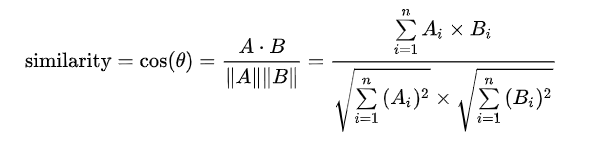

<코사인 유사도 공식>

In [ ]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도 계산
def cos_sim(vec1, vec2):
  return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# TDM 만들기
def make_term_doc_mat(sentence_bow, word_dics):
  freq_mat = {}

  for word in word_dics:
    freq_mat[word] = 0

  for word in word_dics:
    if word in sentence_bow:
      freq_mat[word] += 1

  return freq_mat

def make_vector(tdm):
  vec = []
  for key in tdm:
    vec.append(tdm[key])
  return vec

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 선생님과 함께 먹었다.'

komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

bow = bow1 + bow2 + bow3

word_dics = []

for token in bow:
  if token not in word_dics:
    word_dics.append(token)

freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1)
print(r2)